In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
import random
from collections import Counter
np.random.seed(0)
random.seed(0)
ran=0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope



import seaborn as sn
import pandas as pd
from sklearn.utils import class_weight

In [2]:
Folder=r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output"
FolderSave=r"C:\Users\zz587-admin\Documents\sleep center paper\figure\python\cm"

Data_ver=r'\Feat_detect_v1'
Folder=Folder + Data_ver 

path=Folder+r'\featureAll'+Data_ver+"_feature_data.mat"

data = sio.loadmat(path)
featureNCS = data['featureNCS']
featureNCS=np.nan_to_num(featureNCS, nan=0,posinf=1000)
# featureNCS=np.delete(featureNCS,np.arange(16,37),1)
featureNCS_wo = featureNCS[:,0:-4]
labelNCS = data['labelNCS']
labelNCS_2 = data['labelNCS_2']
labelNCS_3 = data['labelNCS_3']
labelNCS_4 = data['labelNCS_4']



featurePSG= data['featurePSG2']
featurePSG=np.nan_to_num(featurePSG, nan=0,posinf=1000)
featurePSG_wo = featurePSG[:,0:-4]
labelPSG = data['labelPSG2']
labelPSG_2 = data['labelPSG2_2']
labelPSG_3 = data['labelPSG2_3']
labelPSG_4 = data['labelPSG2_4']
caseNumNCS=data['caseNumNCS']
# caseNumPSG=data['caseNumPSG']
caseNumPSG=data['caseNumPSG2']


featureNCS_l=featureNCS
featureNCS_wo_l = featureNCS[:,0:-4]
featurePSG_l=featurePSG
featurePSG_wo_l = featurePSG[:,0:-4]

featureNCS_s=np.delete(featureNCS,np.arange(16,37),1)
featureNCS_wo_s = featureNCS_s[:,0:-4]
featurePSG_s=np.delete(featurePSG,np.arange(16,37),1)
featurePSG_wo_s = featurePSG_s[:,0:-4] 



In [3]:


#function for k-fold CV. 
# return  y  =(truth,predict),  acc_all = all accuracy of all folds  ,acc =  mean accuracy ,cm = all data's confusion matrix ,featureName2,importance2 =average feat imp


#opt[0]  = 0 use balanced sample weight   opt[0]  = 0  specify weight
def k_foldCV(x,y,opt,w):
    rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1,random_state=0)
    b=10
    num=6
    y=y.ravel()
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    test_ind_all=[]
    
    bal='balanced'
    if x.shape[1]==20 or x.shape[1]==16:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'mean(spo2)' ,'std(spo2)', 'min(spo2)', 'percent(spo2)']
    else:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                    'skew_mean' , 'kurt_mean' ,'entro',\
                    'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                        'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                        'Cor(br)','SD(br)','Cor(pp)','SD(pp)','Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                        'psd(1)','psd(2)','psd(3)','psd(4)','fmax(1)','fmax(2)','fmax(3)','fmax(4)',\
                        'mean(spo2)' ,'std(spo2)', ',min(spo2)', 'percent(spo2)']
    
    for train_ind, test_ind in rkf.split(x,y):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        
        
        
        #balance the sample 
        if opt[0]==1:
            s=class_weight.compute_sample_weight(w,y_train)            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight=w).fit(X_train,y_train,sample_weight=s)
            #clf = DecisionTreeClassifier(max_depth=10,class_weight=w,random_state=0).fit(X_train,y_train) 
        if opt[0]==0:            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight="balanced").fit(X_train,y_train)
        #clf = SVC(C=3, kernel="rbf").fit(X_train,y_train)
        y_p = clf.predict(X_test)
        acc=accuracy_score(y_test, y_p)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
            test_ind_all.append(test_ind[i])
        
        acc_all.append(acc)

        impt_temp=clf.feature_importances_
        impt.append(impt_temp)
    #clf = RandomForestClassifier(max_depth=5,n_estimators=50,max_features=None,random_state=ran).fit(X_train,y_train)
    # clf = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)


    impt=np.array(impt) 
    importance2=np.mean(impt,axis=0)
    seq=np.argsort(importance2)
    featureName=np.array(featureName)
    featureName2=featureName[seq]
    importance2=importance2[seq]
    importance2=np.flip(importance2)
    featureName2=np.flip(featureName2)


    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))
    test_ind_all=np.array(test_ind_all)

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
    
    print(cm)
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
         
        print('acc=' + str(round(acc, 3)),'sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))  
    else:  
        print(acc) 

    return y,acc_all,acc,cm,featureName2,importance2,test_ind_all


#function for subject-independent CV.  
#input: x=features y=labels  group= case group 
# return  y  =(truth,predict),  acc_all = all accuracy for all cases  ,acc =  mean accuracy ,cm = all data's confusion matrix ,featureName2,importance2 =average feat imp

def groupCV(x,y,group,opt,w):
    a=5
    b=10
    num=20
    rkf = LeaveOneGroupOut()
    if x.shape[1]==20 or x.shape[1]==16:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    else:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                    'skew_mean' , 'kurt_mean' ,'entro',\
                    'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                        'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                        'Cor(br)','SD(br)','Cor(pp)','SD(pp)','Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                        'psd(1)','psd(2)','psd(3)','psd(4)','fmax(1)','fmax(2)','fmax(3)','fmax(4)',\
                        'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    y=y.ravel()
    group=group.ravel()
   
    
    for train_ind, test_ind in rkf.split(x,y,group):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        
        (unique, counts) = np.unique(group[test_ind], return_counts=True)
        frequencies = np.asarray((unique, counts)).T
        print(frequencies)   

        if opt[0]==1:
            s=class_weight.compute_sample_weight(w,y_train)            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight=w).fit(X_train,y_train,sample_weight=s)
            #clf = DecisionTreeClassifier(max_depth=10,class_weight=w,random_state=0).fit(X_train,y_train) 
        if opt[0]==0:            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight='balanced').fit(X_train,y_train)
        
        y_p = clf.predict(X_test)
        acc=accuracy_score(y_test, y_p)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)
        

        impt_temp=clf.feature_importances_
        impt.append(impt_temp)



    impt=np.array(impt) 
    importance2=np.mean(impt,axis=0)
    seq=np.argsort(importance2)
    featureName=np.array(featureName)
    featureName2=featureName[seq]
    importance2=importance2[seq]
    importance2=np.flip(importance2)
    featureName2=np.flip(featureName2)

    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
   
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
        print('acc=' + str(round(acc, 3)),'sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))  
    else:  
        print(acc) 
    

    return y,acc_all,acc,cm,featureName2,importance2



# get sensitivity and precision from confusion matrix 
def cm_parameter(cm):
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
        
    print('sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))    
    return sen,spe


In [4]:
## delete some data with bad performance 
# test over deleted data 
# long features 
opt1=[0]
opt2=[1]
w1={0:1,1:2.2}
w2={0:1,1:2}
featureNCS=featureNCS_s
featureNCS_wo=featureNCS_wo_s
featurePSG=featurePSG_s
featurePSG_wo=featurePSG_wo_s




y_NCS,acc_all_NCS,acc_NCS,cm_NCS,feat_NCS,impt_NCS,test_indCV=k_foldCV(featureNCS,labelNCS_3,opt2,w1)
y_NCS_wo,acc_all_NCS_wo,acc_NCS_wo,cm_NCS_wo,feat_NCS_wo,impt_NCS_wo,test_indCV=k_foldCV(featureNCS_wo,labelNCS_3,opt1,w2)


# y_PSG_del1,acc_all_PSG_del1,acc_PSG_del1,cm_PSG_del1,feat_PSG_del1,impt_PSG_del1=k_foldCV(featurePSG_del1,labelPSG_3_del1,opt2,w1)
# y_PSG_wo_del1,acc_all_PSG_wo_del1,acc_PSG_wo_del1,cm_PSG_wo_del1,feat_PSG_wo_del1,impt_PSG_wo_del1=k_foldCV(featurePSG_wo_del1,labelPSG_3_del1,opt1,w2)


[[22072  2671]
 [ 1303  8737]]
acc=0.886 sen=0.87 spe=0.892
[[23354  1389]
 [ 3770  6270]]
acc=0.852 sen=0.625 spe=0.944


In [6]:
caseNumNCS27=np.arange(1,31)
caseNumNCS27=np.delete(caseNumNCS27,[19,23,25], axis=None)  # not found 20 24 26 

feat_per=np.zeros((27,6))
def Output_feat_per_kfold(caseNum,y_all):
    y_per=[]
    for j in range(27):
        ind_case=np.where(caseNumNCS==caseNumNCS27[j])[0]
        #print(ind_case)
        ind_case_kold=np.zeros((len(ind_case),))
        for i in range(len(ind_case)):
            ind_case_kold[i]=int(np.where(test_indCV==ind_case[i])[0])
        print(ind_case_kold.shape)
        ind_case_kold = np.array(ind_case_kold, dtype='int')
        y=y_all[:,ind_case_kold]
        y_per.append(y.tolist())
        
        feat=[np.count_nonzero(y[0,:] == 0),np.count_nonzero(y[0,:] == 1),np.count_nonzero(y[0,:] == 1)/np.count_nonzero(y[0,:] == 0),\
            np.count_nonzero(y[1,:] == 0),np.count_nonzero(y[1,:] == 1),np.count_nonzero(y[1,:] == 1)/np.count_nonzero(y[1,:] == 0),]
        feat_per[j,:]=feat 
    return feat_per,y_per

feat_per_NCS_k,y_per_NCS_k=Output_feat_per_kfold(caseNumNCS,y_NCS)
feat_per_NCS_wo_k,y_per_NCS_wo_k=Output_feat_per_kfold(caseNumNCS,y_NCS_wo)

(1424,)
(2014,)
(2254,)
(2687,)
(1214,)
(1404,)
(936,)
(1330,)
(1736,)
(1014,)
(1229,)
(1085,)
(884,)
(1402,)
(975,)
(1417,)
(318,)
(475,)
(1793,)
(1111,)
(1110,)
(947,)
(2643,)
(729,)
(1057,)
(1119,)
(476,)
(1424,)
(2014,)
(2254,)
(2687,)
(1214,)
(1404,)
(936,)
(1330,)
(1736,)
(1014,)
(1229,)
(1085,)
(884,)
(1402,)
(975,)
(1417,)
(318,)
(475,)
(1793,)
(1111,)
(1110,)
(947,)
(2643,)
(729,)
(1057,)
(1119,)
(476,)


In [68]:
print(test_indCV)

[    3     7    22 ... 34774 34779 34782]


In [40]:
# group CV  subject -independent 
# auto class weight 
# return  y  =(truth,predict)
opt1=[0]
opt2=[1]
w1={0:1,1:4}
w2={0:1,1:3}


y_NCS_g,acc_all_NCS_g,acc_NCS_g,cm_NCS_g,feat_NCS_g,impt_NCS_g=\
    groupCV(featureNCS,labelNCS_3,caseNumNCS,opt1,w1)
y_NCS_wo_g,acc_all_NCS_wo_g,acc_NCS_wo_g,cm_NCS_wo_g,feat_NCS_wo_g,impt_NCS_wo_g=\
    groupCV(featureNCS_wo,labelNCS_3,caseNumNCS,opt1,w2)


    

[[   1 1424]]
[[   2 2014]]
[[   3 2254]]
[[   4 2687]]
[[   5 1214]]
[[   6 1404]]
[[  7 936]]
[[   8 1330]]
[[   9 1736]]
[[  10 1014]]
[[  11 1229]]
[[  12 1085]]
[[ 13 884]]
[[  14 1402]]
[[ 15 975]]
[[  16 1417]]
[[ 17 318]]
[[ 18 475]]
[[  19 1793]]
[[  21 1111]]
[[  22 1110]]
[[ 23 947]]
[[  25 2643]]
[[ 27 729]]
[[  28 1057]]
[[  29 1119]]
[[ 30 476]]
acc=0.884 sen=0.826 spe=0.907
[[   1 1424]]
[[   2 2014]]
[[   3 2254]]
[[   4 2687]]
[[   5 1214]]
[[   6 1404]]
[[  7 936]]
[[   8 1330]]
[[   9 1736]]
[[  10 1014]]
[[  11 1229]]
[[  12 1085]]
[[ 13 884]]
[[  14 1402]]
[[ 15 975]]
[[  16 1417]]
[[ 17 318]]
[[ 18 475]]
[[  19 1793]]
[[  21 1111]]
[[  22 1110]]
[[ 23 947]]
[[  25 2643]]
[[ 27 729]]
[[  28 1057]]
[[  29 1119]]
[[ 30 476]]
acc=0.843 sen=0.584 spe=0.948


In [47]:
# can be changed : whether to del_outlier?  
# feature in each participant : pred0 case num;pred 1 case num; true 0 case num; true 1 case num. pred apnea ratio; true apnea ratio 
caseNumNCS27=np.arange(1,31)
caseNumNCS27=np.delete(caseNumNCS27,[19,23,25], axis=None)  # not found 20 24 26 

feat_per=np.zeros((27,6))
def Output_feat_per(caseNum,y_all):
    y_per=[]
    for j in range(27):
        ind_case=np.where(caseNumNCS==caseNumNCS27[j])[0]
        #print(ind_case)
        y=y_all[:,ind_case]
        y_per.append(y.tolist())
        
        feat=[np.count_nonzero(y[0,:] == 0),np.count_nonzero(y[0,:] == 1),np.count_nonzero(y[0,:] == 1)/np.count_nonzero(y[0,:] == 0),\
            np.count_nonzero(y[1,:] == 0),np.count_nonzero(y[1,:] == 1),np.count_nonzero(y[1,:] == 1)/np.count_nonzero(y[1,:] == 0),]
        feat_per[j,:]=feat 
    return feat_per,y_per

feat_per_NCS,y_per_NCS=Output_feat_per(caseNumNCS,y_NCS_g)
feat_per_NCS_wo,y_per_NCS_wo=Output_feat_per(caseNumNCS,y_NCS_wo_g)

# np.load(r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output\AHI_all\feat_per\feat6_groupCV_pred_NCS.npz",\
#                   feat_per_NCS=feat_per_NCS,y_per_NCS=y_per_NCS,\
#              feat_per_NCS_wo=feat_per_NCS_wo,y_per_NCS_wo=y_per_NCS_wo,caseNumNCS=caseNumNCS_del1)

In [55]:
np.savez(r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output\AHI_all\feat_per\feat6_groupCV_pred_NCS.npz",\
                  feat_per_NCS=feat_per_NCS,y_per_NCS=y_per_NCS,\
             feat_per_NCS_wo=feat_per_NCS_wo,y_per_NCS_wo=y_per_NCS_wo,caseNumNCS=caseNumNCS)

C:\Users\zz587-admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
np.savez(r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output\AHI_all\feat_per\feat6_kCV_pred_NCS.npz",\
                  feat_per_NCS_k=feat_per_NCS_k,y_per_NCS_k=y_per_NCS_k,\
             feat_per_NCS_wo_k=feat_per_NCS_wo_k,y_per_NCS_wo_k=y_per_NCS_wo_k,caseNumNCS=caseNumNCS)

C:\Users\zz587-admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [2]:


data=np.load(r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output\AHI_all\feat_per\feat6_kCV_pred_NCS.npz")
feat_per_NCS=data['feat_per_NCS_k']
feat_per_NCS_wo=data['feat_per_NCS_wo_k']

Folder=r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output"


Data_ver=r'\AHI_all'


path=Folder+Data_ver+r"\feat_per\AHI_feat_select.mat"

data = sio.loadmat(path)
AHI_class1 = data['AHI_class1']
AHI_class2 = data['AHI_class2']
AHI_class3 = data['AHI_class3']
AHI_all = data['AHI_all']
feat_select = data['feat_select']

In [3]:
print(feat_select.shape)
feat_select = np.nan_to_num(feat_select, copy=True)
print(feat_per_NCS.shape)
feat_AHI=np.hstack((feat_per_NCS,feat_select))
#feat_AHI_k=np.hstack((feat_per_NCS_k,feat_select))

# y_AHI=[]
# acc_AHI=[]
# acc_all_AHI=[]
# for i in range(1,11):
#     y,acc_all,acc=groupCV_AHI(feat_AHI[:,:6],AHI_class1,i)
#     y_AHI.append(y)
#     acc_AHI.append(acc)
#     acc_all_AHI.append(acc_all)

# for i in range(1,11):
#     y,acc_all,acc=groupCV_AHI(feat_AHI[:,:6],AHI_class2,i)
#     y_AHI.append(y)
#     acc_AHI.append(acc)
    
#     acc_all_AHI.append(acc_all)


(27, 4)
(27, 6)


In [57]:
max_acc=np.max(acc_AHI)
max_model=np.where(acc_AHI==max_acc)[0]
print(max_acc,max_model)

0.7648148148148151 [7]


In [29]:
y_class_k,acc_all_class_k,acc_class_k,cm=groupCV_AHI_binary(feat_AHI[:,:],AHI_class3,5)
# y_class_g,acc_all_class_g,acc_class_g=groupCV_AHI(feat_AHI[:,:],AHI_class1,8)
print(y_class_k)

sen=0.947 spe=0.875
0.9259259259259259
[[2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 1]
 [2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2]]


In [35]:
y_class3_k,acc_all_class3_k,acc_class3_k,cm_class3=groupCV_AHI_binary(feat_AHI[:,:],AHI_class2,5)
y_class2_k,acc_all_class2_k,acc_class2_k,cm_class2=groupCV_AHI_binary(feat_AHI[:,:],AHI_class3,5)  

0.7037037037037037
sen=0.947 spe=0.875
0.9259259259259259


In [34]:
print(cm_class3)

[[ 7  1  0]
 [ 2 12  1]
 [ 0  4  0]]


In [27]:
cm=confusion_matrix(y_class_k[0,:], y_class_k[1,:])

In [ ]:
y_class_g,acc_all_class_g,acc_class_g=groupCV_AHI(feat_AHI[:,:],AHI_class1,8)

In [92]:
# do AHI number regression 

y_score_k,acc_all_score_k,acc_score_k=groupCV_AHI(feat_AHI_k[:,:],AHI_all,8)
print(y_score_k)

0.8478976867439831
[[ 6.125       5.875      12.          6.7        18.1        11.57142857
   0.75        3.5        10.4        13.         17.1         3.14285714
  10.         11.66666667 14.5         9.44444444 16.8         6.125
   7.7         0.42857143  0.5         5.85714286 24.57142857  6.42857143
   2.5         2.5         2.57142857]
 [ 8.13158333  5.97452778  6.08178175 12.8868373  12.69241667 11.26700794
   2.99357143  4.34425    10.58060714 10.73913889 10.7121746   0.98928571
  14.41744048  8.89520635 10.51648016  7.80872619  7.56732143  6.84735317
  11.28588492  1.69035714  1.77934524  5.76944841  8.66741667 13.20963095
   3.17220238  7.40862302  8.13605159]]


In [36]:
from scipy.io import savemat
# savemat(r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output\AHI_all\feat_per\result_ml_model.mat", \
#     {'y_class_k': y_class_k,'acc_all_class_k': acc_all_class_k,'acc_class_k': acc_class_k,\
#         'y_class_g': y_class_g,'acc_all_class_g': acc_all_class_g,'acc_class_g': acc_class_g,\
#        'y_score_k': y_score_k,'acc_all_score_k': acc_all_score_k,'acc_score_k': acc_score_k, \
#            'feat_per_NCS': feat_per_NCS,'feat_per_NCS_wo': feat_per_NCS_wo,'feat_per_NCS_k': feat_per_NCS_k,'feat_per_NCS_wo_k': feat_per_NCS_wo_k,'caseNumNCS27': caseNumNCS27 })
savemat(r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output\AHI_all\feat_per\result_ml_model_class_rfc.mat", \
    {'y_class2_k': y_class2_k,'acc_all_class2_k': acc_all_class2_k,'acc_class2_k': acc_class2_k,'cm_class2': cm_class2,\
      'y_class3_k': y_class3_k,'acc_all_class3_k': acc_all_class3_k,'acc_class3_k': acc_class3_k,'cm_class3': cm_class3,  })

In [28]:
from sklearn.model_selection import LeaveOneOut
def groupCV_AHI(x,y,opt):
   

    rkf = LeaveOneOut()
    
    featureName=['true 0', 'true 1', 'true apnea ratio ' ,'pred 0', 'pred 1', 'pred apnea ratio '  ,\
        'select rate' ,'Tselect 0 rate','select apnea rate1','select apnea rate2',\
        ]
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    y=y.ravel()
    ymax=np.max(y)
   
    
    for train_ind, test_ind in rkf.split(x,y):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        


        clf1 = LogisticRegression(random_state=0,C=0.5,max_iter=10000)
        clf2 = DecisionTreeClassifier(random_state=0)

        clf3 = GaussianNB()
        clf4=  svm.SVR(kernel="rbf", C=0.5)
        clf5 = RandomForestClassifier(random_state=0)
        clf6 = BaggingClassifier(base_estimator=clf1,n_estimators=10, random_state=0)

        clf7 = xgb.XGBClassifier()
        clf8 = RandomForestRegressor()
        clf9 = DecisionTreeRegressor(random_state=0)
        clf10 =xgb.XGBRegressor()

        clf_list=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10]
        i=opt-1
        model=clf_list[i].fit(X_train, y_train)
        y_p = model.predict(X_test)
        ## judgy by score distance 
        
        acc = 1-abs(y_p.astype('float')-y_test.astype('float'))/(ymax-1)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)
    

    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))
    acc_all=np.array(acc_all)
    acc=np.mean(acc_all)
  
    print(acc) 
    

    return y,acc_all,acc

def groupCV_AHI_binary(x,y,opt):
   

    rkf = LeaveOneOut()
    
    featureName=['true 0', 'true 1', 'true apnea ratio ' ,'pred 0', 'pred 1', 'pred apnea ratio '  ,\
        'select rate' ,'Tselect 0 rate','select apnea rate1','select apnea rate2',\
        ]
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    y=y.ravel()
    ymax=np.max(y)
   
    
    for train_ind, test_ind in rkf.split(x,y):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        


        clf1 = LogisticRegression(random_state=0,C=0.5,max_iter=10000)
        clf2 = DecisionTreeClassifier(random_state=0)

        clf3 = GaussianNB()
        clf4=  svm.SVR(kernel="rbf", C=0.5)
        clf5 = RandomForestClassifier(random_state=0)
        clf6 = BaggingClassifier(base_estimator=clf1,n_estimators=10, random_state=0)

        clf7 = xgb.XGBClassifier()
        clf8 = RandomForestRegressor()
        clf9 = DecisionTreeRegressor(random_state=0)
        clf10 =xgb.XGBRegressor()

        clf_list=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10]
        i=opt-1
        model=clf_list[i].fit(X_train, y_train)
        y_p = model.predict(X_test)
        y_p=np.array(y_p,dtype='int')
        ## judgy by score distance 
        
        acc=accuracy_score(y_test, y_p)
        
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)
       
    
    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))
    acc_all=np.array(acc_all)
    acc=np.mean(acc_all)
    cm=confusion_matrix(y_test_all, y_p_all)
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
        print('sen=' + str(round(sen, 3)) + ' spe=' + str(round(spe, 3)))  
    print(acc)
    

    return y,acc_all,acc,cm


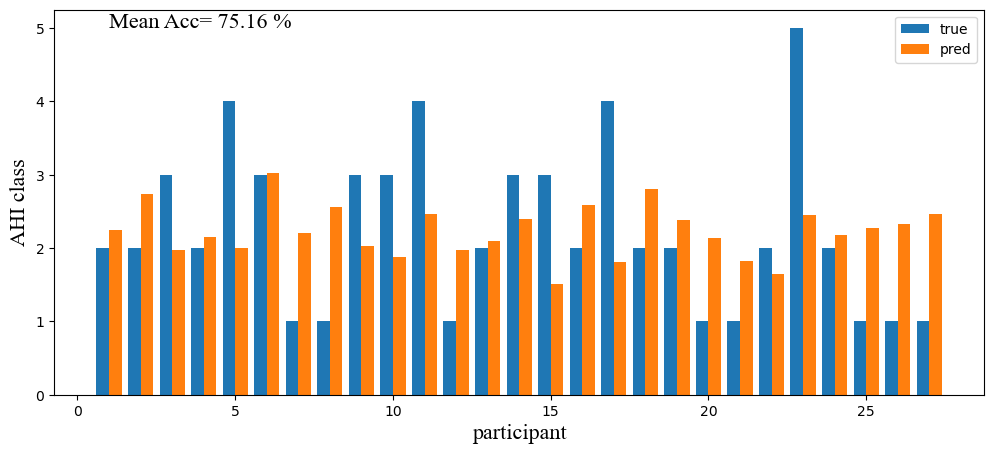

In [12]:

y1=y[0,:]
y2=y[1,:]

bar_width = 0.4
sz=16
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(len(y1))+1-bar_width/2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, y1,width=bar_width,label='true')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, y2,width=bar_width,label='pred')
plt.legend(fontsize=sz)
#plt.ylim(0,4)
plt.grid(False)
axis_font={'fontname':'Times New Roman', 'size':str(sz)}

plt.xlabel('participant',axis_font)
plt.ylabel('AHI class',axis_font)
plt.legend()

s01='Mean Acc'+'= {n:.2f} %'.format(n=acc*100)

plt.text(1,5,s01,axis_font)
plt.show()


In [41]:
FolderSave=r"C:/Users/zz587-admin/Documents/sleep center paper/figure/AHI/"

def cm_parameter(cm):
    cm=np.array(cm)
    print(cm)
  
    sen=cm[1,1]/(cm[1,1]+cm[1,0])
    spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
        
    print('sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))    
    return sen,spe
def plotfig(cm,acc,SaveName):

    labelNum=str(3)  #labelling method 1,2,3,4
    size=18
    name1=["Mild", "Severe"]
    name2=["Mild", "Severe"]
    w=7 #fig size 1      change when label num change
    h=6   #fig size 2
    a=2   #txt position 1   change when label num change
    b=1   #txt position 2

    sen,pre=cm_parameter(cm)
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=2)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size,'fontsize':23})
    s01='Acc={n:.2f}, Sen={n11:.2f}, Spe={n12:.2f}'.\
        format(n=acc,n11=sen,n12=pre)
    
   
    plt.title(s01)

    figure = plt.gcf()
    figure.set_size_inches(w, h)

    plt.savefig(FolderSave+SaveName+r".png",dpi=300)
    #plt.savefig(FolderSave+tleSave+r".svg")

def plotfig3(cm,acc,SaveName):

    
    size=18
    name1=["Mild", "Moderate","Severe"]
    name2=["Mild", "Moderate","Severe"]
    w=8 #fig size 1      change when label num change
    h=6   #fig size 2
    a=2   #txt position 1   change when label num change
    b=1   #txt position 2

    print(cm.shape)
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=2)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size,'fontsize':23})
    s01='Acc={n:.2f}'.\
        format(n=acc)
    
   
    plt.title(s01)

    figure = plt.gcf()
    figure.set_size_inches(w, h)

    plt.savefig(FolderSave+SaveName+r".png",dpi=300)
    #plt.savefig(FolderSave+tleSave+r".svg")

tle1='kfold_feat10_class2'
tle2='kfold_feat10_class3'
plotfig(cm_class2,acc_class2_k,tle1)
plotfig3(cm_class3,acc_class3_k,tle2)

[[ 7  1]
 [ 1 18]]
sen=0.947 spe=0.875
(3, 3)
